# Train-Test-Split 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('AAPL.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2016-04-14,27.905001,28.097500,27.832500,28.025000,26.066298,101895600,0.053552,1.448747
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.543112,187756000,-2.007136,0.053552
2016-04-18,27.222500,27.237499,26.735001,26.870001,24.992023,243286000,-2.157484,-2.007136
2016-04-19,26.969999,27.000000,26.557501,26.727501,24.859484,129539600,-0.530331,-2.157484
2016-04-20,26.660000,27.022499,26.514999,26.782499,24.910643,122444000,0.205773,-0.530331


In [4]:
# to_period("w") splits the series into weekly increments
df.index.to_period("w")

PeriodIndex(['2016-04-11/2016-04-17', '2016-04-11/2016-04-17',
             '2016-04-18/2016-04-24', '2016-04-18/2016-04-24',
             '2016-04-18/2016-04-24', '2016-04-18/2016-04-24',
             '2016-04-18/2016-04-24', '2016-04-25/2016-05-01',
             '2016-04-25/2016-05-01', '2016-04-25/2016-05-01',
             ...
             '2021-03-22/2021-03-28', '2021-03-29/2021-04-04',
             '2021-03-29/2021-04-04', '2021-03-29/2021-04-04',
             '2021-03-29/2021-04-04', '2021-04-05/2021-04-11',
             '2021-04-05/2021-04-11', '2021-04-05/2021-04-11',
             '2021-04-05/2021-04-11', '2021-04-05/2021-04-11'],
            dtype='period[W-SUN]', name='Date', length=1256, freq='W-SUN')

In [5]:
# construct a list of all Pandas weekly periods that are in the dataset:
weeks = df.index.to_period("w").unique()
weeks

PeriodIndex(['2016-04-11/2016-04-17', '2016-04-18/2016-04-24',
             '2016-04-25/2016-05-01', '2016-05-02/2016-05-08',
             '2016-05-09/2016-05-15', '2016-05-16/2016-05-22',
             '2016-05-23/2016-05-29', '2016-05-30/2016-06-05',
             '2016-06-06/2016-06-12', '2016-06-13/2016-06-19',
             ...
             '2021-02-01/2021-02-07', '2021-02-08/2021-02-14',
             '2021-02-15/2021-02-21', '2021-02-22/2021-02-28',
             '2021-03-01/2021-03-07', '2021-03-08/2021-03-14',
             '2021-03-15/2021-03-21', '2021-03-22/2021-03-28',
             '2021-03-29/2021-04-04', '2021-04-05/2021-04-11'],
            dtype='period[W-SUN]', name='Date', length=261, freq='W-SUN')

# Time Calculations

The following example shows the calculations for the first training period and the first testing period

In [6]:
# Training Window (26 weeks)
training_window = 26

In [7]:
# Beginning of training window
start_of_training_period = weeks[0].start_time.strftime(format="%Y-%m-%d")
start_of_training_period

'2016-04-11'

In [8]:
# End of training window
end_of_training_period = weeks[training_window + 0].end_time.strftime(format="%Y-%m-%d")
end_of_training_period

'2016-10-16'

In [9]:
# The week of the first test window
test_week = weeks[training_window + 0 + 1]
test_week

Period('2016-10-17/2016-10-23', 'W-SUN')

In [10]:
# The first day of the test week
start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
start_of_test_week

'2016-10-17'

In [11]:
# The last day of the test week
end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
end_of_test_week

'2016-10-23'

In [12]:
# Training data with just one window
train = df[start_of_training_period:end_of_training_period]
train

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2016-04-14,27.905001,28.097500,27.832500,28.025000,26.066298,101895600,0.053552,1.448747
2016-04-15,28.027500,28.075001,27.432501,27.462500,25.543112,187756000,-2.007136,0.053552
2016-04-18,27.222500,27.237499,26.735001,26.870001,24.992023,243286000,-2.157484,-2.007136
2016-04-19,26.969999,27.000000,26.557501,26.727501,24.859484,129539600,-0.530331,-2.157484
2016-04-20,26.660000,27.022499,26.514999,26.782499,24.910643,122444000,0.205773,-0.530331
2016-04-21,26.732500,26.732500,26.379999,26.492500,24.640911,126210000,-1.082793,0.205773
2016-04-22,26.252501,26.620001,26.155001,26.420000,24.573479,134732400,-0.273662,-1.082793
2016-04-25,26.250000,26.412500,26.127501,26.270000,24.433960,112126400,-0.567752,-0.273662
2016-04-26,25.977501,26.325001,25.977501,26.087500,24.264212,224064800,-0.694709,-0.567752


In [13]:
# Testing data with just one window
test = df[start_of_test_week:end_of_test_week]
test

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2016-10-17,29.332500,29.459999,29.195000,29.387501,27.648966,94499600,-0.068003,0.555644
2016-10-18,29.545000,29.552500,29.362499,29.367500,27.630150,98214000,-0.068060,-0.068003
2016-10-19,29.312500,29.440001,28.450001,29.280001,27.547821,80138400,-0.297945,-0.068060
2016-10-20,29.215000,29.344999,29.082500,29.264999,27.533712,96503200,-0.051236,-0.297945
2016-10-21,29.202499,29.227501,29.070000,29.150000,27.425516,92770800,-0.392957,-0.051236


# Putting it all together

In [14]:
# Set the training window as 26 weeks
# Total timeframe is 287 weeks
training_window = 26
timeframe = len(weeks) - training_window - 1
timeframe

234

In [15]:
# Construct an empty placeholder DataFrame, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_predictions

,Out-of-Sample Predictions


In [16]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Returns"])
all_actuals

,Actual Returns


In [17]:
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window + i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window+i+1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df[start_of_training_period:end_of_training_period]
    test = df[start_of_test_week:end_of_test_week]
    
    # Create new DataFrames:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Return"]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
   
    # Create a temporary DataFrame to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test DataFrame, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
   
    # Append these two DataFrames (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

* Training period are we weeks[i] and weeks[training_window+i], respectively.
* Testing period is defined as weeks[training_window+i+1]
* The test period X values are used to predict y values.

In [18]:
all_predictions.head()

,Out-of-Sample Predictions
2016-10-17,0.173872
2016-10-18,0.016856
2016-10-19,0.016842
2016-10-20,-0.041036
2016-10-21,0.021078


In [19]:
 all_actuals.head()

,Actual Returns
2016-10-17,-0.068003
2016-10-18,-0.068060
2016-10-19,-0.297945
2016-10-20,-0.051236
2016-10-21,-0.392957


In [20]:
# Once the loop is done, concatenate (combine) the two DataFrames to a final "Results" DataFrame:    
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
2016-10-17,-0.068003,0.173872
2016-10-18,-0.068060,0.016856
2016-10-19,-0.297945,0.016842
2016-10-20,-0.051236,-0.041036
2016-10-21,-0.392957,0.021078


<AxesSubplot:>

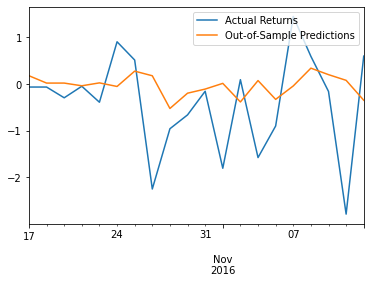

In [21]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=False)

# RMSE for Out-of-sample Predictions

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    Results["Actual Returns"],
    Results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.9604951932658705
